## Parameter Estimation
This document describes how to use BasiCO for paramter estimation tasks. This document assumes, that the parameter estimation task was already set up using COPASI. Look for another example, to set up a parameter estimation task directly from basiCO.

We start as normal: 

In [1]:
import sys
if '..' not in sys.path: 
    sys.path.append('..')

from basico import *
%matplotlib inline

Now we load an example model, that already has paramter estimation set up: 

In [2]:
dm = load_example('LM')

with `get_fit_parameters` we can look at the paramters, that will be estimated, along with their bounds, and a list of experiments they apply to. If that list is empty, the parameter applies to all experiment, otherwise only the one mentioned. 

In [3]:
get_fit_parameters()

,lower,upper,start,affected,cn
name,,,,,
(R1).k2,1e-6,1e6,1.0,[],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
(R2).k1,1e-6,1e6,1.0,[],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
Values[offset],-0.2,0.4,0.1,[Experiment_1],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
Values[offset],-0.2,0.4,0.1,[Experiment_3],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
Values[offset],-0.2,0.4,0.1,[Experiment],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
Values[offset],-0.2,0.4,0.1,[Experiment_4],"CN=Root,Model=Kinetics of a Michaelian enzyme..."
Values[offset],-0.2,0.4,0.1,[Experiment_2],"CN=Root,Model=Kinetics of a Michaelian enzyme..."


Now lets see how well the current fit is: 

In [4]:
run_parameter_estimation(method='Statistics')

,lower,upper,sol,affected
name,,,,
(R1).k2,1e-6,1e6,0.000002,[]
(R2).k1,1e-6,1e6,44.661715,[]
Values[offset],-0.2,0.4,0.043018,[Experiment_1]
Values[offset],-0.2,0.4,0.054167,[Experiment_3]
Values[offset],-0.2,0.4,-0.050941,[Experiment]
Values[offset],-0.2,0.4,0.045922,[Experiment_4]
Values[offset],-0.2,0.4,0.048025,[Experiment_2]


if ever you wanted to get the solution of the last run, you can execute `get_parameters_solution`

In [5]:
get_parameters_solution()

,lower,upper,sol,affected
name,,,,
(R1).k2,1e-6,1e6,0.000002,[]
(R2).k1,1e-6,1e6,44.661715,[]
Values[offset],-0.2,0.4,0.043018,[Experiment_1]
Values[offset],-0.2,0.4,0.054167,[Experiment_3]
Values[offset],-0.2,0.4,-0.050941,[Experiment]
Values[offset],-0.2,0.4,0.045922,[Experiment_4]
Values[offset],-0.2,0.4,0.048025,[Experiment_2]


To see what experiment files are there, you can run

In [6]:
pe_get_experiment_names()

['Experiment', 'Experiment_1', 'Experiment_2', 'Experiment_3', 'Experiment_4']

the experimental data can be obtained like so: 

In [7]:
data = get_experiment_data_from_model()

In [8]:
data[1]

,[S]_0,Time,Values[signal]
0,0.31623,0.3,0.08568
1,0.31623,0.6,0.12849
2,0.31623,0.9,0.16599
3,0.31623,1.2,0.19788
4,0.31623,1.5,0.22046
...,...,...,...
95,0.31623,28.8,0.27933
96,0.31623,29.1,0.28938
97,0.31623,29.4,0.28208
98,0.31623,29.7,0.25544


In [9]:
len(data)

5

or to get a specific data set you can get it directly from the name: 

In [10]:
df = get_data_from_experiment('Experiment')

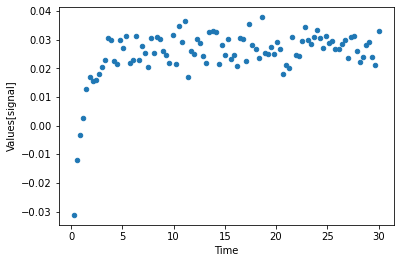

In [11]:
df.plot(kind='scatter', x='Time', y="Values[signal]");

you can also look directly at the mapping, of the data. in this `independent` will mean that it is an initial value that is different in this experiment. `dependent` is the mapping to a model variable such as the transient concentration or a transient value of a model parameter. 

In [12]:
get_experiment_mapping('Experiment')

,type,mapping,cn
column,,,
0,independent,[S]_0,"CN=Root,Model=Kinetics of a Michaelian enzyme..."
1,time,,
2,dependent,Values[signal],"CN=Root,Model=Kinetics of a Michaelian enzyme..."


you can also plot the current fit, by running: 

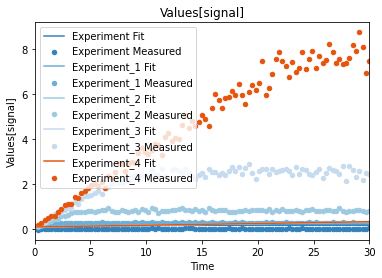

In [13]:
plot_per_dependent_variable();

now lets combine it, by actyally running the parameter estimation (here using the Levenberg Marquardt algorithm)

In [14]:
run_parameter_estimation(method='Levenberg - Marquardt', update_model=True)

,lower,upper,sol,affected
name,,,,
(R1).k2,1e-6,1e6,0.000002,[]
(R2).k1,1e-6,1e6,44.729444,[]
Values[offset],-0.2,0.4,0.043013,[Experiment_1]
Values[offset],-0.2,0.4,0.054212,[Experiment_3]
Values[offset],-0.2,0.4,-0.050942,[Experiment]
Values[offset],-0.2,0.4,0.040968,[Experiment_4]
Values[offset],-0.2,0.4,0.047976,[Experiment_2]


A first predefined plot function creates one plot for each defined dependent variable, containing all experiments in which it appears. 

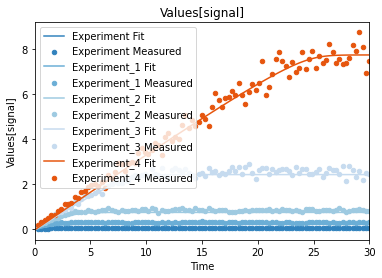

In [15]:
plot_per_dependent_variable();

a second predefined plot function created one plot for each experiment, including all contained dependent values: 

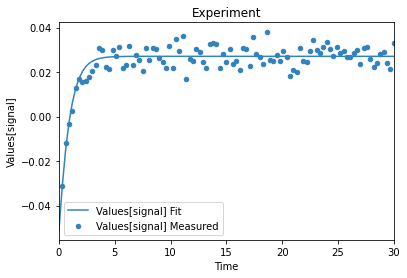

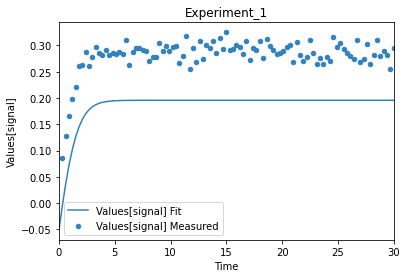

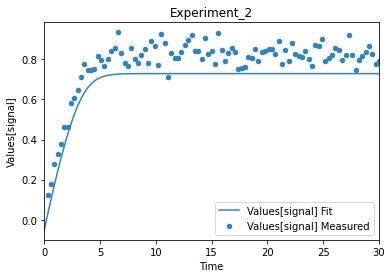

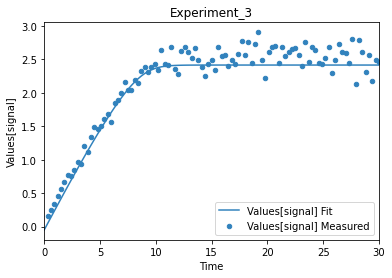

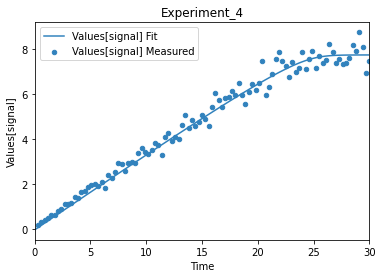

In [16]:
plot_per_experiment();

you also get all the data sets returned, so you can plot them yourself howerver you like

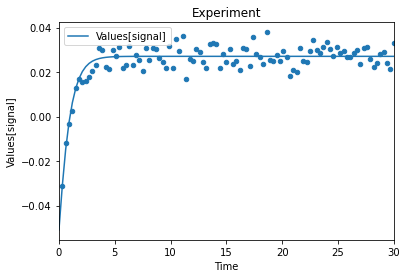

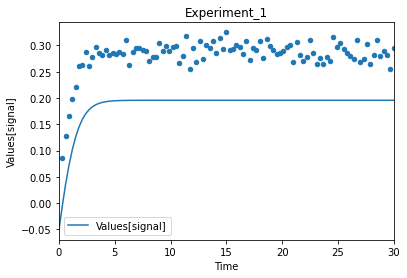

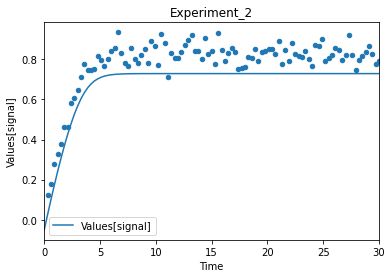

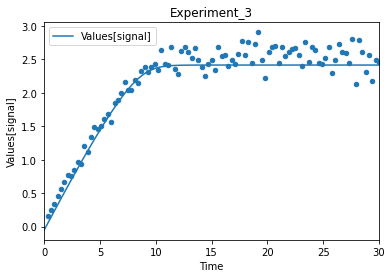

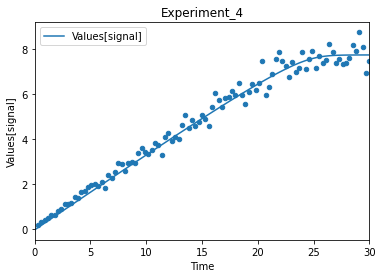

In [17]:
exp, sim = get_simulation_results()
for i in range(len(exp)):
    ax = exp[i].plot.scatter(x='Time', y='Values[signal]')
    sim[i].reset_index().plot(x='Time', y='Values[signal]', ax=ax)
    ax.set_title(pe_get_experiment_names()[i])